# Softmax Classifier using TensorFlow

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import numpy as np


In [3]:
print("number of data points : ", mnist.train.images.shape[0],"number of pixels in each image :",mnist.train.images.shape[1])

number of data points :  55000 number of pixels in each image : 784


In [4]:
print("number of data points : ", mnist.test.labels.shape[0]," length of the one hot encoded label vector :",mnist.test.labels.shape[1])

number of data points :  10000  length of the one hot encoded label vector : 10


In [5]:
import tensorflow as tf

In [6]:
# Get a list of devices like GPUs and CPUs available to TF

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6607413377444227067
]


### Placeholders and Variables

In [7]:
# We want to be able to input any number of MNIST images, 
# each flattened into a 784-dimensional vector. 

# We represent this as a 2-D tensor of floating-point numbers, 
# with a shape [None, 784]. 

# (Here None means that a dimension can be of any length.)
x = tf.placeholder(tf.float32, [None, 784])

# We also need the weights and biases for our model. 

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# First, we multiply x by W with the expression tf.matmul(x, W). 
# We then add b, and finally apply tf.nn.softmax.

y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
y

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [10]:
# y_ is true label of the images, and similar to x
y_ = tf.placeholder(tf.float32, [None, 10])


# Defining the loss function: multi class log-loss/cross-entropy
# First, tf.log computes the logarithm of each element of y. 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [11]:
# We ask TensorFlow to minimize cross_entropy 
# using the gradient descent algorithm with a learning rate of 0.05.
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


Instructions for updating:
Use tf.cast instead.


In [12]:
# We can now launch the model in an InteractiveSession
sess = tf.InteractiveSession()

# We first have to create an operation to initialize the 
# variables we created:
tf.global_variables_initializer().run()

In [13]:
# Each step of the loop, we get a "mini-batch" of one hundred random data 
# points from our training set. 

# We run train_step feeding in the batches data to replace 
# the placeholders
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [14]:
# tf.argmax(input, axis=None, name=None, dimension=None)
# Returns the index with the largest value across axis of a tensor.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9016


In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
def plt_dynamic(x, y, y_1, ax, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
    fig.canvas.draw()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<IPython.core.display.Javascript object>


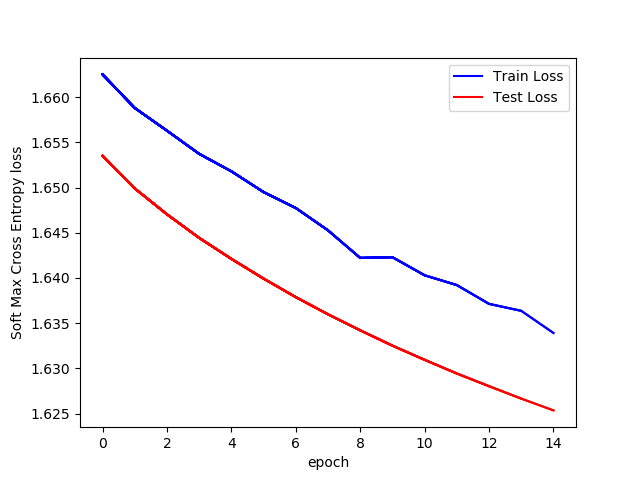

Accuracy: 0.9006


In [16]:
# summarizing everything in single cell
training_epochs = 15
batch_size = 1000
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
xs, ytrs, ytes = [], [], []
for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
            train_avg_cost += c / total_batch
            c = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax)
        

plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))